<h1>GRIP : The Sparks Foundation</h1>

<strong>Data Science and Business Analytics Intern</strong>

<h3>Author : Akhila Vegiraju</h3>

<strong>Task 1 : Prediction Using Supervised ML</strong>

<p><strong>In this task we have tp predict the percentage score of a student based on the number of hours studied. The task has two variables where the feature is the no.of hours studied and the target value is the percentage score. this can be solved using simple linear regression.</strong></p>

In [1]:
#Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

<h4>Reading data from remote url</h4>

In [2]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

<h4>Exploring Data</h4>

In [3]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


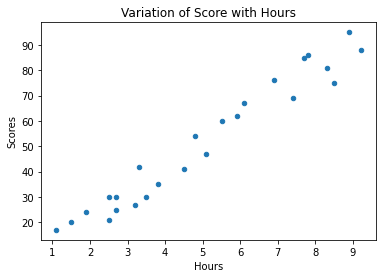

In [6]:
data.plot(kind='scatter',x='Hours',y='Scores');
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Variation of Score with Hours')
plt.show()

In [7]:
data.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [8]:
data.corr(method ='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [9]:
hours=data['Hours']
scores=data['Scores']

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

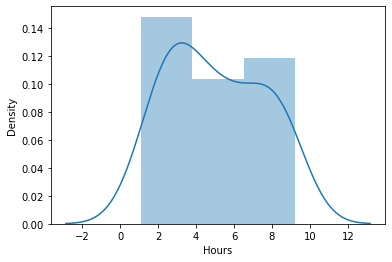

In [10]:
sns.distplot(hours)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

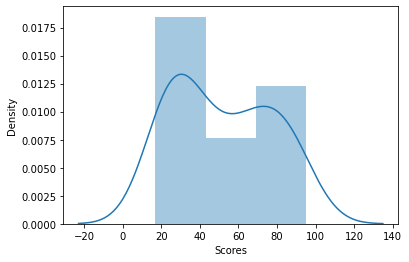

In [11]:
sns.distplot(scores)

<h4>Linear Regression</h4>

In [12]:
x= data.iloc[:,:-1].values
y= data.iloc[:,1].values
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [14]:
#Trainging our linear reggression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print('Training Completed')

Training Completed


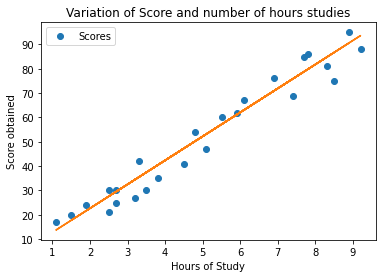

In [15]:
data.plot(x='Hours',y='Scores',style='o')
line = regressor.coef_*x + regressor.intercept_
plt.plot(x,line);
plt.title('Variation of Score and number of hours studies')
plt.xlabel('Hours of Study')
plt.ylabel('Score obtained')
plt.show()

<h1>Score Prediction</h1>

In [16]:
predicted = regressor.predict(x_test)
new_data = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
new_data

,Actual,Predicted
0,30,27.590582
1,30,37.446611
2,20,17.734553
3,67,63.072286
4,75,86.726755
5,21,27.590582
6,25,29.561788


In [17]:
hours = 9.25
x = regressor.predict([[hours]]).reshape(1)
'Score obtained by student for {} hours = {}'.format(hours,x[0])

'Score obtained by student for 9.25 hours = 94.11877624475106'